In [16]:
(pd.read_csv('constant_c_row.csv')['loss'] / 1e27).min()

2.4919305168023187

1.0 46.29785893788855


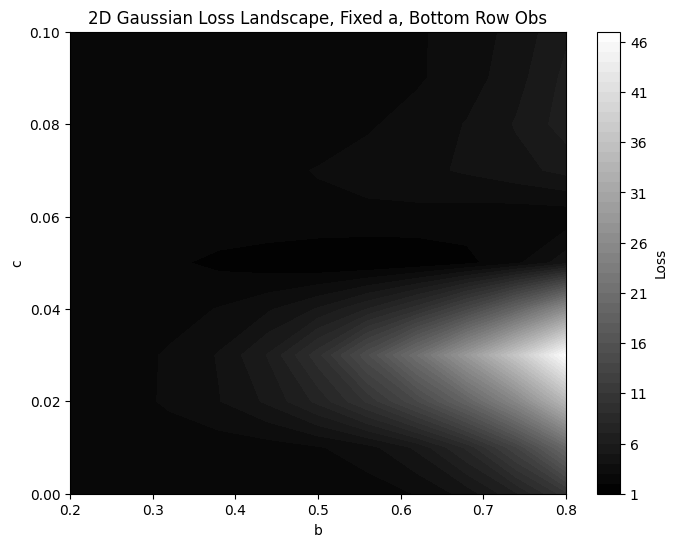

1.0 2.3805453625561976


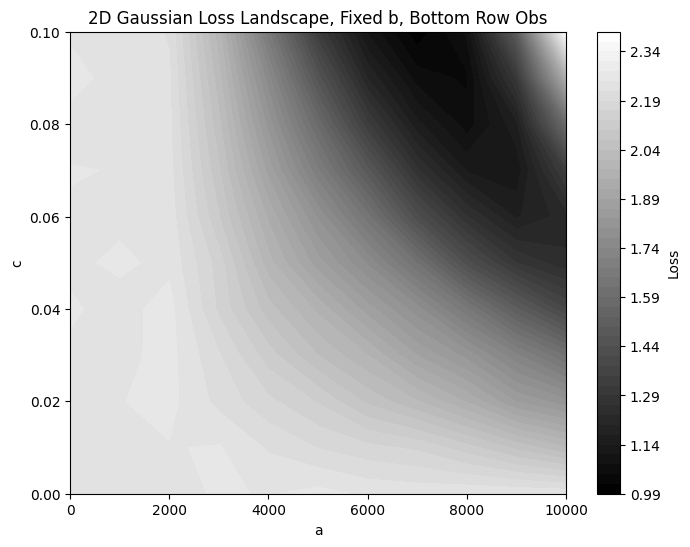

1.0 1.0700460464889863


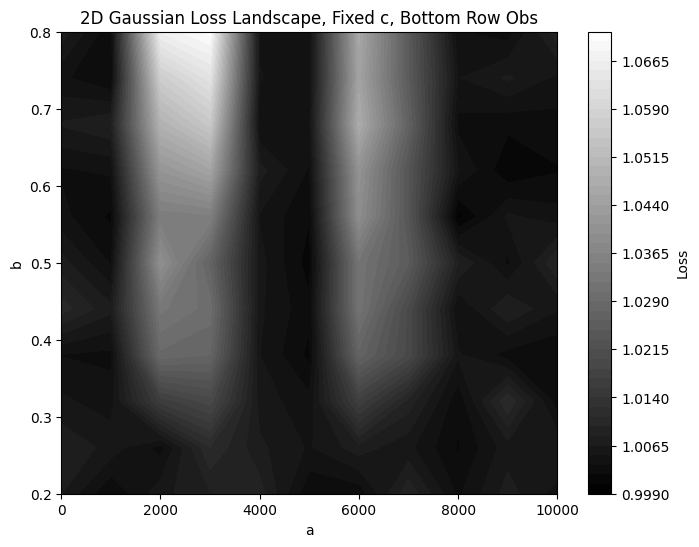

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

param_names = ['a', 'b', 'c']
static_params = ['a', 'b', 'c']

for name in static_params:
    sub_params = param_names.copy()
    sub_params.remove(name)

    filename = 'constant_' + name + '_row.csv'
    results_df = pd.read_csv(filename)

    param1 = results_df[sub_params[0]]
    param2 = results_df[sub_params[1]]
    loss = results_df['loss'] / results_df['loss'].min()
    print(loss.min(), loss.max())

    # Create a grid for contour plotting
    param1_unique = np.unique(param1)
    param2_unique = np.unique(param2)

    # Reshape the loss values into a 2D grid
    loss_grid = loss.values.reshape(len(param1_unique), len(param2_unique))

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(param1_unique, param2_unique, loss_grid, levels=50, cmap='grey')#, norm=mpl.colors.LogNorm())
    plt.colorbar(contour, label='Loss')
    plt.xlabel(sub_params[0])
    plt.ylabel(sub_params[1])
    plt.title('2D Gaussian Loss Landscape, Fixed ' + name + ", Bottom Row Obs")
    plt.show()